In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


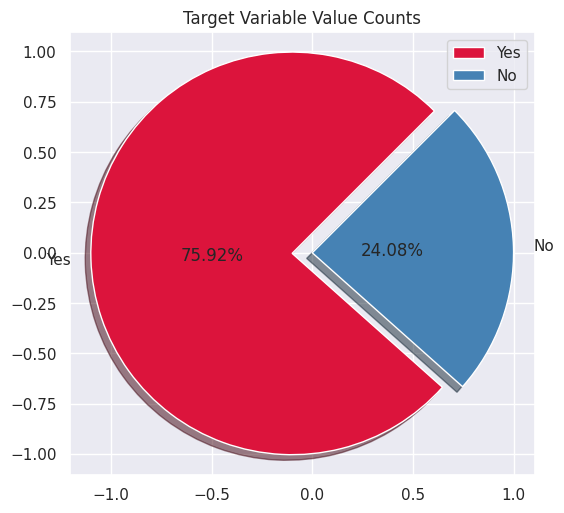

In [5]:
## ploting the target variable for seeing balance or imbalance

plt.figure(figsize = (6, 6))
plt.pie(x = df['salary'].value_counts(),
        labels = ['Yes', 'No'],
        shadow = True,
        colors = ['crimson', 'steelblue'],
        autopct = '%0.2f%%',
        startangle = 45,
        explode = [0.1, 0],
        frame = True,
        pctdistance = 0.4)
plt.title('Target Variable Value Counts')
plt.legend()
plt.show()

In [6]:
X = df.drop('salary', axis=1)
y = df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 38)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 30621 to 32161
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       22792 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital-status  22792 non-null  object
 6   occupation      22792 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital-gain    22792 non-null  int64 
 11  capital-loss    22792 non-null  int64 
 12  hours-per-week  22792 non-null  int64 
 13  country         22792 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.6+ MB


In [8]:
# Dropping multiple columns
X_train.drop(['education', 'country'], axis=1, inplace = True)
X_test.drop(['education', 'country'], axis=1, inplace = True)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 30621 to 32161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       22792 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   education-num   22792 non-null  int64 
 4   marital-status  22792 non-null  object
 5   occupation      22792 non-null  object
 6   relationship    22792 non-null  object
 7   race            22792 non-null  object
 8   sex             22792 non-null  object
 9   capital-gain    22792 non-null  int64 
 10  capital-loss    22792 non-null  int64 
 11  hours-per-week  22792 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.3+ MB


In [10]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 22792 entries, 30621 to 32161
Series name: salary
Non-Null Count  Dtype
--------------  -----
22792 non-null  int64
dtypes: int64(1)
memory usage: 356.1 KB


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 2962 to 3930
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9769 non-null   int64 
 1   workclass       9769 non-null   object
 2   fnlwgt          9769 non-null   int64 
 3   education-num   9769 non-null   int64 
 4   marital-status  9769 non-null   object
 5   occupation      9769 non-null   object
 6   relationship    9769 non-null   object
 7   race            9769 non-null   object
 8   sex             9769 non-null   object
 9   capital-gain    9769 non-null   int64 
 10  capital-loss    9769 non-null   int64 
 11  hours-per-week  9769 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 992.2+ KB


In [12]:
#dropping random values from some columns
def introduce_missing_values(df, columns, fraction=0.1):
    df_with_nan = df.copy()
    for col in columns:
        nan_indices = df_with_nan[col].sample(frac=fraction, random_state=42).index
        df_with_nan.loc[nan_indices, col] = np.nan
    return df_with_nan

columns_to_modify = ['age', 'hours-per-week']
X_train = introduce_missing_values(X_train, columns_to_modify, fraction=0.1)

In [13]:
#dropping random values from some columns
def introduce_missing_values(df, columns, fraction=0.1):
    df_with_nan = df.copy()
    for col in columns:
        nan_indices = df_with_nan[col].sample(frac=fraction, random_state=42).index
        df_with_nan.loc[nan_indices, col] = np.nan
    return df_with_nan

columns_to_modify = ['age', 'hours-per-week']
X_test = introduce_missing_values(X_test, columns_to_modify, fraction=0.1)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 30621 to 32161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             20513 non-null  float64
 1   workclass       22792 non-null  object 
 2   fnlwgt          22792 non-null  int64  
 3   education-num   22792 non-null  int64  
 4   marital-status  22792 non-null  object 
 5   occupation      22792 non-null  object 
 6   relationship    22792 non-null  object 
 7   race            22792 non-null  object 
 8   sex             22792 non-null  object 
 9   capital-gain    22792 non-null  int64  
 10  capital-loss    22792 non-null  int64  
 11  hours-per-week  20513 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 2.8+ MB


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 2962 to 3930
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8792 non-null   float64
 1   workclass       9769 non-null   object 
 2   fnlwgt          9769 non-null   int64  
 3   education-num   9769 non-null   int64  
 4   marital-status  9769 non-null   object 
 5   occupation      9769 non-null   object 
 6   relationship    9769 non-null   object 
 7   race            9769 non-null   object 
 8   sex             9769 non-null   object 
 9   capital-gain    9769 non-null   int64  
 10  capital-loss    9769 non-null   int64  
 11  hours-per-week  8792 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


In [16]:
#imputation
from sklearn.impute import SimpleImputer
import numpy as np

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

columns_to_impute = ['age', 'hours-per-week']
impute.fit(X_train[columns_to_impute])

X_train[columns_to_impute] = impute.transform(X_train[columns_to_impute])

impute.fit(X_train[columns_to_impute])

SimpleImputer()

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 30621 to 32161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22792 non-null  float64
 1   workclass       22792 non-null  object 
 2   fnlwgt          22792 non-null  int64  
 3   education-num   22792 non-null  int64  
 4   marital-status  22792 non-null  object 
 5   occupation      22792 non-null  object 
 6   relationship    22792 non-null  object 
 7   race            22792 non-null  object 
 8   sex             22792 non-null  object 
 9   capital-gain    22792 non-null  int64  
 10  capital-loss    22792 non-null  int64  
 11  hours-per-week  22792 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 2.8+ MB


In [18]:
#imputation
from sklearn.impute import SimpleImputer
import numpy as np

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

columns_to_impute = ['age', 'hours-per-week']
impute.fit(X_test[columns_to_impute])

X_test[columns_to_impute] = impute.transform(X_test[columns_to_impute])

impute.fit(X_test[columns_to_impute])

SimpleImputer()

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 2962 to 3930
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9769 non-null   float64
 1   workclass       9769 non-null   object 
 2   fnlwgt          9769 non-null   int64  
 3   education-num   9769 non-null   int64  
 4   marital-status  9769 non-null   object 
 5   occupation      9769 non-null   object 
 6   relationship    9769 non-null   object 
 7   race            9769 non-null   object 
 8   sex             9769 non-null   object 
 9   capital-gain    9769 non-null   int64  
 10  capital-loss    9769 non-null   int64  
 11  hours-per-week  9769 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


In [20]:
X_train.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


In [21]:
X_test.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


In [22]:
X_train.nunique()

,0
age,74
workclass,9
fnlwgt,16701
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2
capital-gain,117


In [23]:
X_test.nunique()

,0
age,71
workclass,9
fnlwgt,8345
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2
capital-gain,97


In [24]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['workclass', 'marital-status',
                       'occupation', 'relationship', 'race', 'sex']

# Dictionary to store LabelEncoders for each column
encoders = {}

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    encoders[col] = le  # Store the encoder for future use

# Verify the transformation
print(X_train.head())



        age  workclass  fnlwgt  education-num  marital-status  occupation  \
30621  32.0          2  100135             13               2          10   
1275   51.0          2  152754             13               2           1   
10671  17.0          4   33138              8               4          12   
25007  53.0          4  154891              5               2          14   
31901  33.0          4  199046             13               4          12   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  
30621             5     4    0             0             0            35.0  
1275              0     4    1             0             0            40.0  
10671             3     4    1             0             0            40.0  
25007             0     4    1             0             0            40.0  
31901             1     4    0             0             0            40.0  


In [25]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['workclass', 'marital-status',
                       'occupation', 'relationship', 'race', 'sex']

# Dictionary to store LabelEncoders for each column
encoders = {}

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])
    encoders[col] = le  # Store the encoder for future use

# Verify the transformation
print(X_test.head())

            age  workclass  fnlwgt  education-num  marital-status  occupation  \
2962   38.45894          4  121264             11               2          10   
29009  37.00000          4   99146             13               2          12   
12290  30.00000          4  110594              9               0           1   
9202   38.45894          4  295649              9               5           8   
24442  54.00000          4  343242             13               2          12   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  
2962              0     4    1             0             0       40.463376  
29009             0     4    1             0             0       60.000000  
12290             3     4    0             0             0       40.000000  
9202              4     4    0             0             0       40.463376  
24442             0     4    1             0             0       40.000000  


In [26]:
#correlation features
X_train_corr = X_train.corr()
X_train_corr

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
age,1.000000,0.007966,-0.066825,0.035433,-0.255940,-0.014912,-0.247139,0.024672,0.086328,0.073677,0.048857,0.059885
workclass,0.007966,1.000000,-0.014076,0.050275,-0.066555,0.255956,-0.092121,0.051347,0.101746,0.032487,0.011064,0.131259
fnlwgt,-0.066825,-0.014076,1.000000,-0.043762,0.021705,0.000752,0.005324,-0.020232,0.021730,-0.002482,-0.013824,-0.016437
education-num,0.035433,0.050275,-0.043762,1.000000,-0.066095,0.109845,-0.092954,0.038267,0.013323,0.121986,0.080438,0.141333
marital-status,-0.255940,-0.066555,0.021705,-0.066095,1.000000,-0.007907,0.182732,-0.067427,-0.126245,-0.041221,-0.037399,-0.179567
occupation,-0.014912,0.255956,0.000752,0.109845,-0.007907,1.000000,-0.079682,0.008700,0.084251,0.021874,0.022985,0.078727
relationship,-0.247139,-0.092121,0.005324,-0.092954,0.182732,-0.079682,1.000000,-0.114138,-0.580054,-0.056032,-0.062657,-0.233882
race,0.024672,0.051347,-0.020232,0.038267,-0.067427,0.008700,-0.114138,1.000000,0.084972,0.013145,0.015761,0.042279
sex,0.086328,0.101746,0.021730,0.013323,-0.126245,0.084251,-0.580054,0.084972,1.000000,0.043569,0.045395,0.216294
capital-gain,0.073677,0.032487,-0.002482,0.121986,-0.041221,0.021874,-0.056032,0.013145,0.043569,1.000000,-0.031552,0.070860


In [27]:
#correlation features
X_test_corr = X_test.corr()
X_test_corr

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.008580,-0.078853,0.020631,-0.237045,-0.035428,-0.252067,0.029519,0.075866,0.077043,0.069305,0.081124
workclass,-0.008580,1.000000,-0.022958,0.056373,-0.060502,0.252358,-0.086553,0.046064,0.082253,0.036908,0.014898,0.137673
fnlwgt,-0.078853,-0.022958,1.000000,-0.041832,0.044044,0.003676,0.017627,-0.023870,0.039419,0.007316,-0.001718,-0.018324
education-num,0.020631,0.056373,-0.041832,1.000000,-0.076898,0.109351,-0.096946,0.017053,0.009824,0.124141,0.078742,0.132237
marital-status,-0.237045,-0.060502,0.044044,-0.076898,1.000000,-0.013849,0.191908,-0.069305,-0.136764,-0.048483,-0.026752,-0.185252
occupation,-0.035428,0.252358,0.003676,0.109351,-0.013849,1.000000,-0.066100,0.002323,0.070962,0.033734,0.006446,0.076590
relationship,-0.252067,-0.086553,0.017627,-0.096946,0.191908,-0.066100,1.000000,-0.120453,-0.588067,-0.062166,-0.057411,-0.237474
race,0.029519,0.046064,-0.023870,0.017053,-0.069305,0.002323,-0.120453,1.000000,0.092417,0.006730,0.026000,0.039402
sex,0.075866,0.082253,0.039419,0.009824,-0.136764,0.070962,-0.588067,0.092417,1.000000,0.059596,0.045969,0.218392
capital-gain,0.077043,0.036908,0.007316,0.124141,-0.048483,0.033734,-0.062166,0.006730,0.059596,1.000000,-0.031761,0.084934


<Axes: >

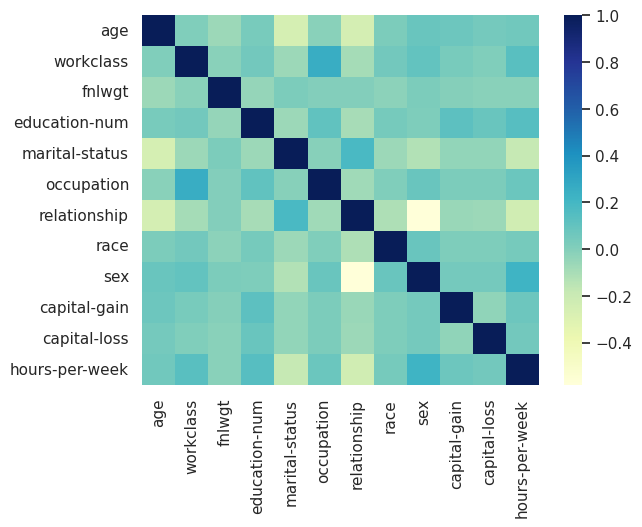

In [28]:
#heatmap
sns.heatmap(X_train_corr, cmap = 'YlGnBu')

<Axes: >

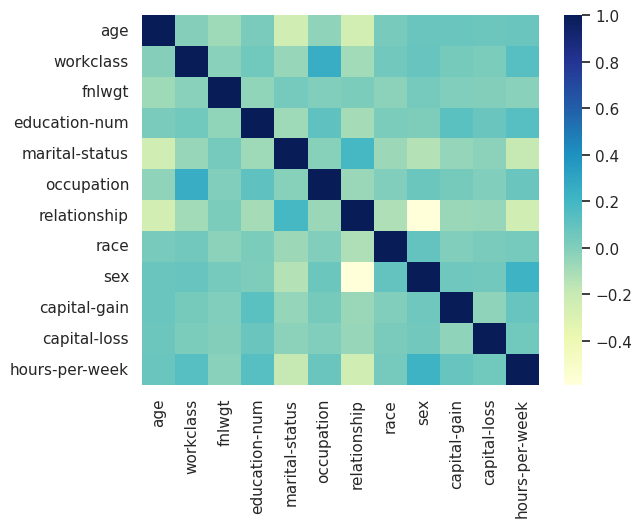

In [29]:
#heatmap
sns.heatmap(X_test_corr, cmap = 'YlGnBu')

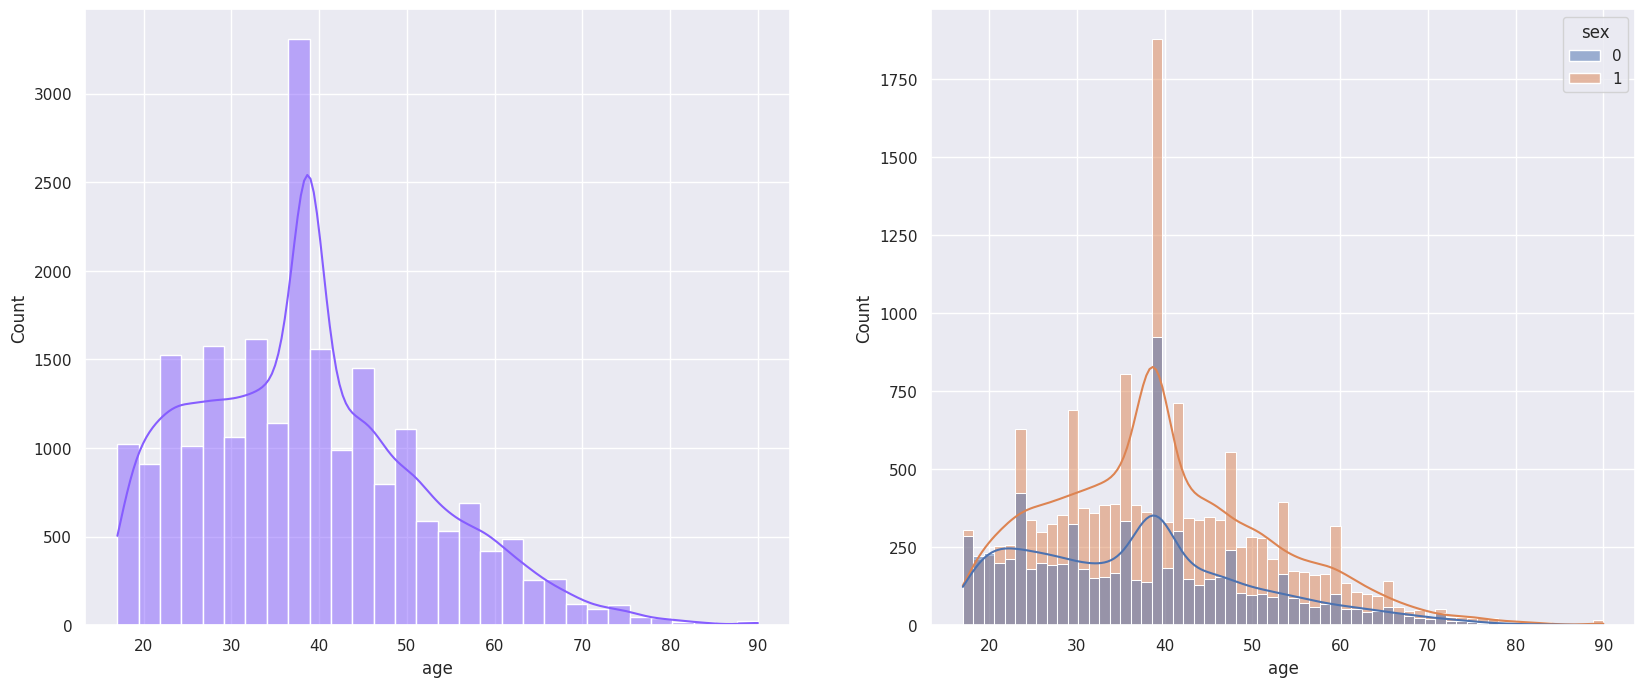

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=X_train, x='age', bins=30, kde=True, color='#865DFF')
plt.subplot(122)
sns.histplot(data=X_train, x='age', kde=True, hue='sex')
plt.show()

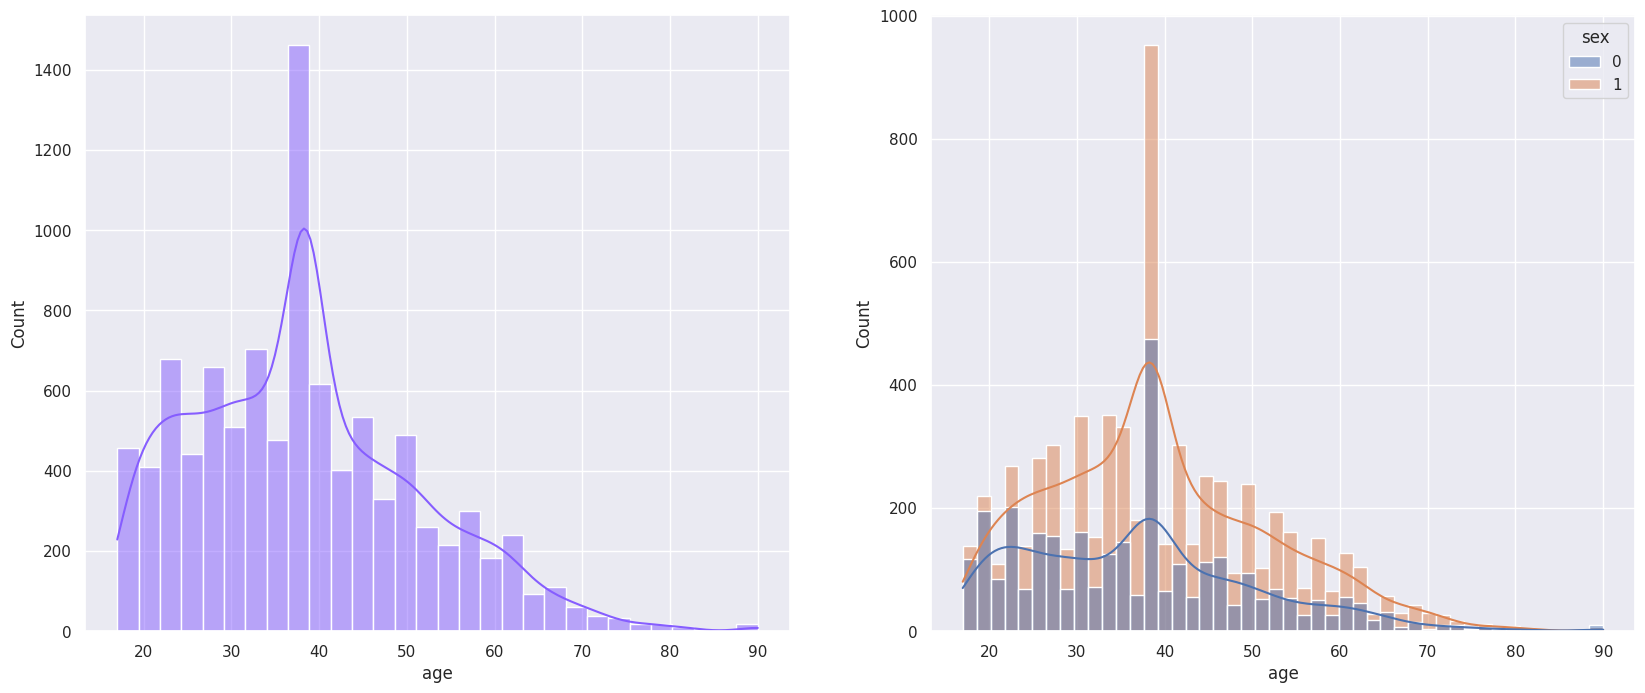

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=X_test, x='age', bins=30, kde=True, color='#865DFF')
plt.subplot(122)
sns.histplot(data=X_test, x='age', kde=True, hue='sex')
plt.show()

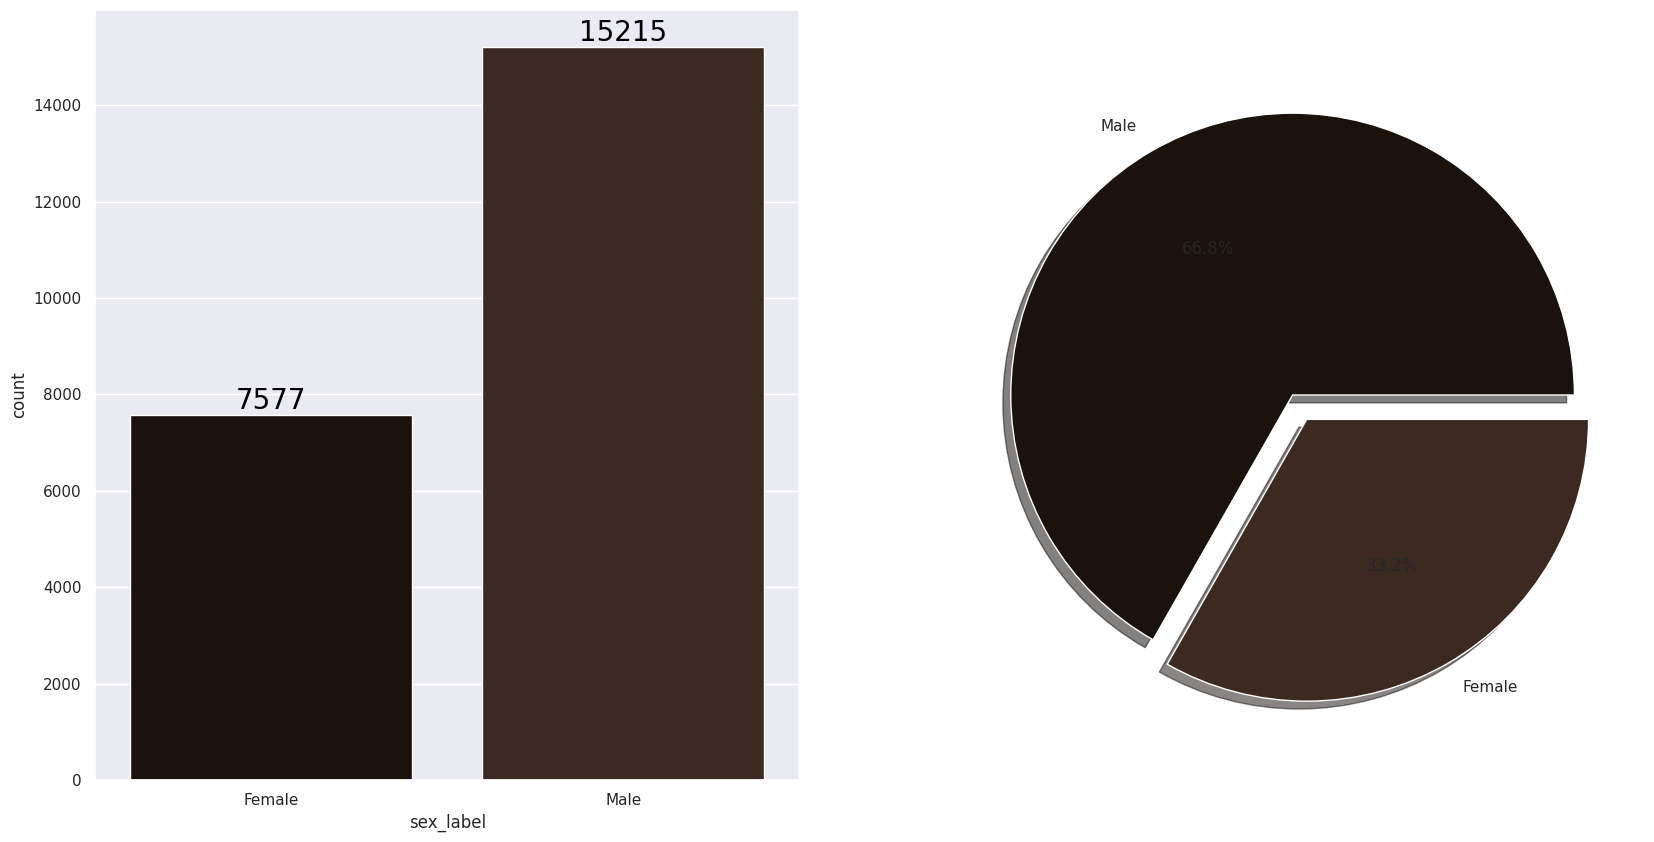

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map the numerical `sex` column back to its original labels
X_train['sex_label'] = X_train['sex'].map({0: 'Female', 1: 'Male'})

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Define a custom palette
custom_palette = {'Female': '#1A120B', 'Male': '#3C2A21'}

# Plot the countplot
sns.countplot(x='sex_label', data=X_train, palette=custom_palette, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart
plt.pie(
    x=X_train['sex_label'].value_counts(),
    labels=['Male', 'Female'],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#1A120B', '#3C2A21']
)

# Show the plots
plt.show()


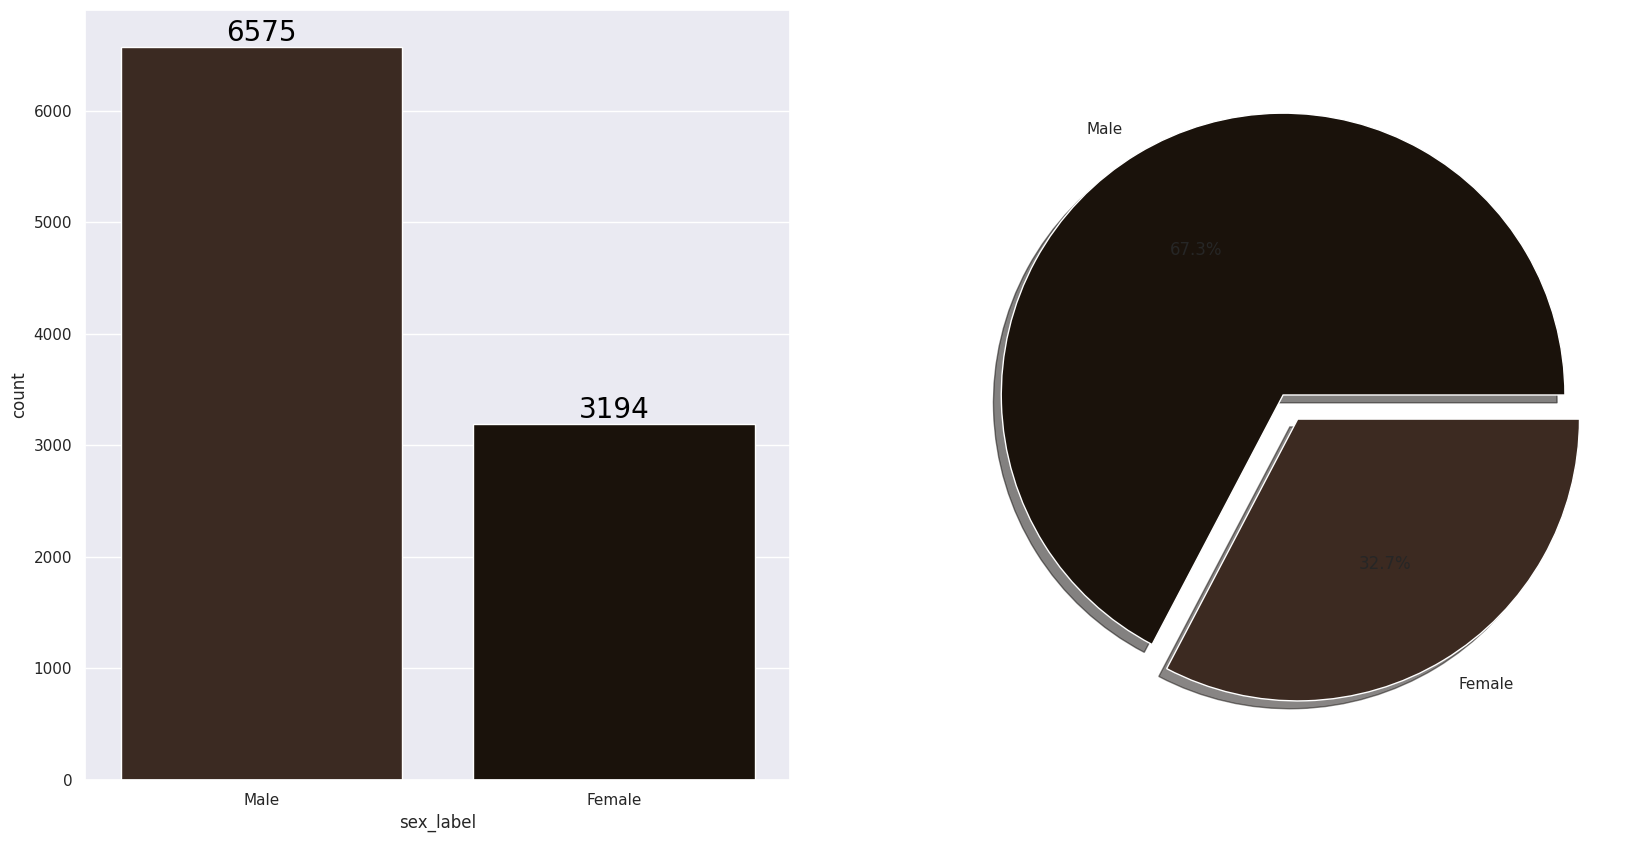

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map the numerical `sex` column back to its original labels
X_test['sex_label'] = X_test['sex'].map({0: 'Female', 1: 'Male'})

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Define a custom palette
custom_palette = {'Female': '#1A120B', 'Male': '#3C2A21'}

# Plot the countplot
sns.countplot(x='sex_label', data=X_test, palette=custom_palette, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart
plt.pie(
    x=X_test['sex_label'].value_counts(),
    labels=['Male', 'Female'],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#1A120B', '#3C2A21']
)

# Show the plots
plt.show()


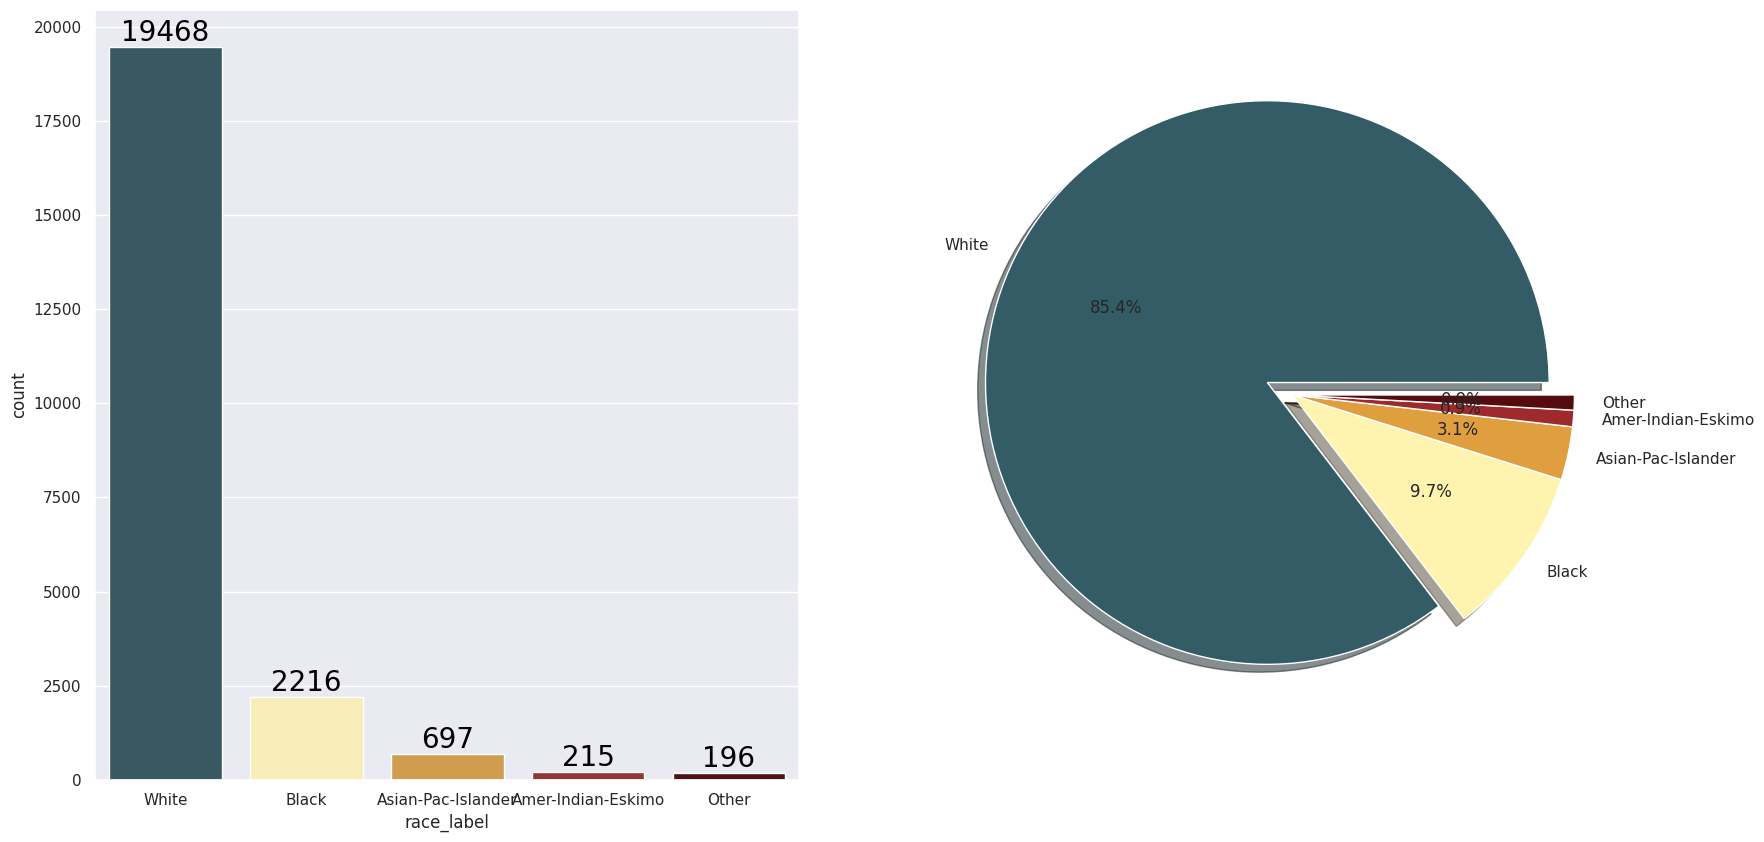

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map the numerical `race` column back to its original labels
# Replace the mapping dictionary with the appropriate labels from your dataset
race_mapping = {0: 'Amer-Indian-Eskimo', 1: 'Asian-Pac-Islander', 2: 'Black', 3: 'Other', 4: 'White'}
X_train['race_label'] = X_train['race'].map(race_mapping)

# Define the custom color palette
custom_palette = ['#335c67', '#fff3b0', '#e09f3e', '#9e2a2b', '#540b0e']

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot
sns.countplot(x='race_label', data=X_train, palette=custom_palette, ax=ax[0], saturation=0.80)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart
plt.pie(
    x=X_train['race_label'].value_counts(),
    labels=X_train['race_label'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True,
    colors=custom_palette
)

# Show the plots
plt.show()


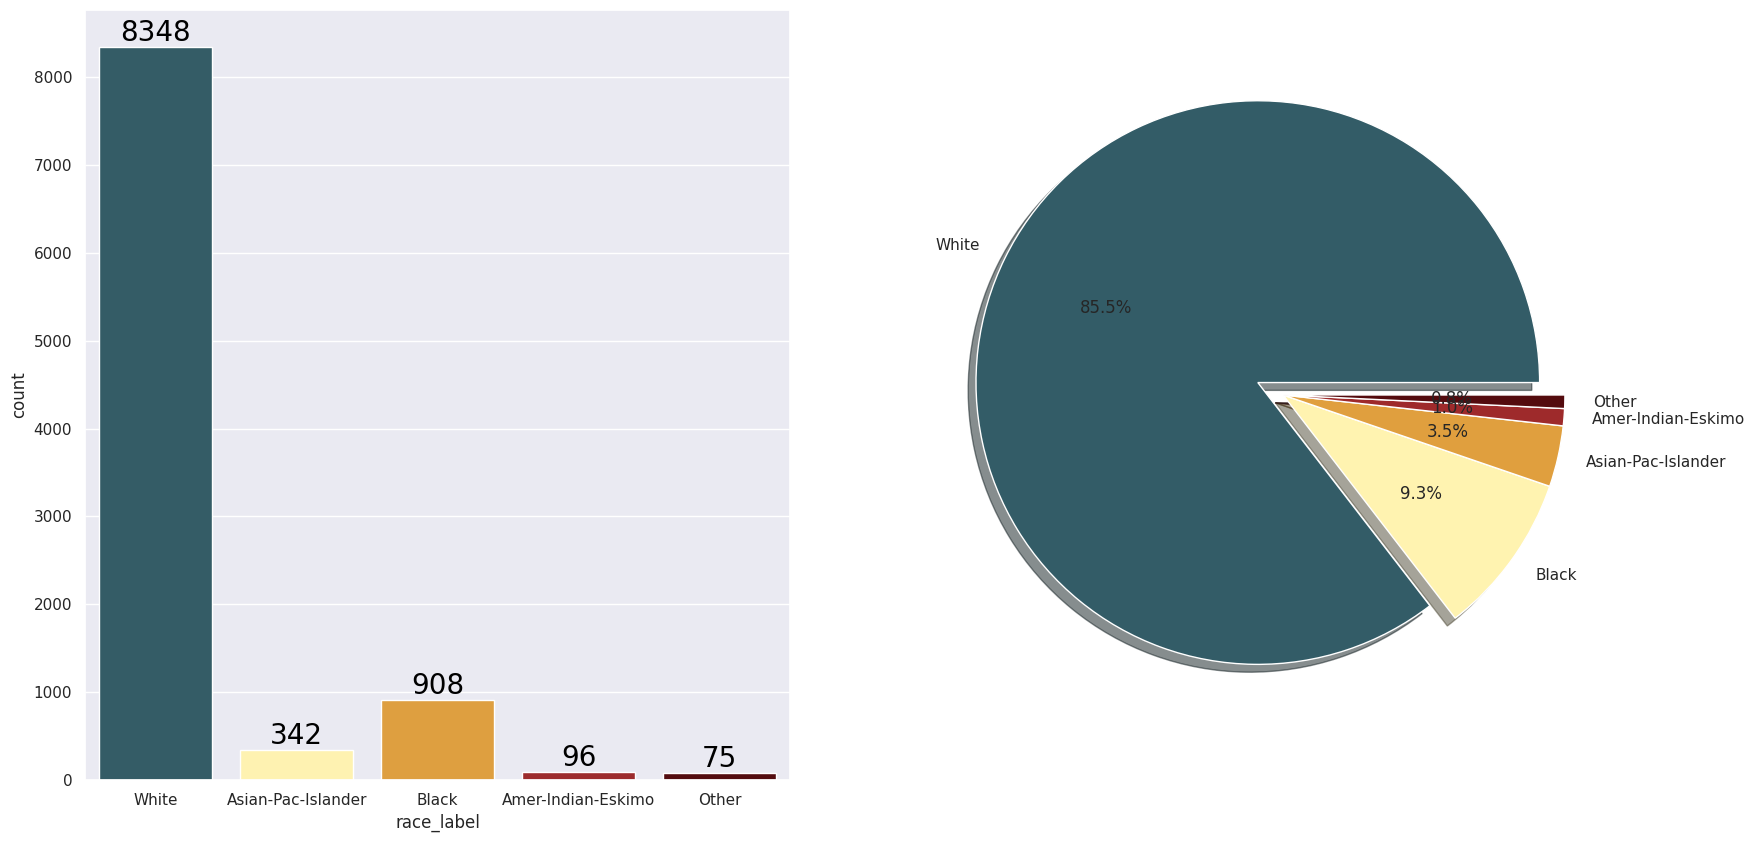

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map the numerical `race` column back to its original labels
# Replace the mapping dictionary with the appropriate labels from your dataset
race_mapping = {0: 'Amer-Indian-Eskimo', 1: 'Asian-Pac-Islander', 2: 'Black', 3: 'Other', 4: 'White'}
X_test['race_label'] = X_test['race'].map(race_mapping)

# Define the custom color palette
custom_palette = ['#335c67', '#fff3b0', '#e09f3e', '#9e2a2b', '#540b0e']

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot
sns.countplot(x='race_label', data=X_test, palette=custom_palette, ax=ax[0], saturation=0.97)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart
plt.pie(
    x=X_test['race_label'].value_counts(),
    labels=X_test['race_label'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True,
    colors=custom_palette
)

# Show the plots
plt.show()


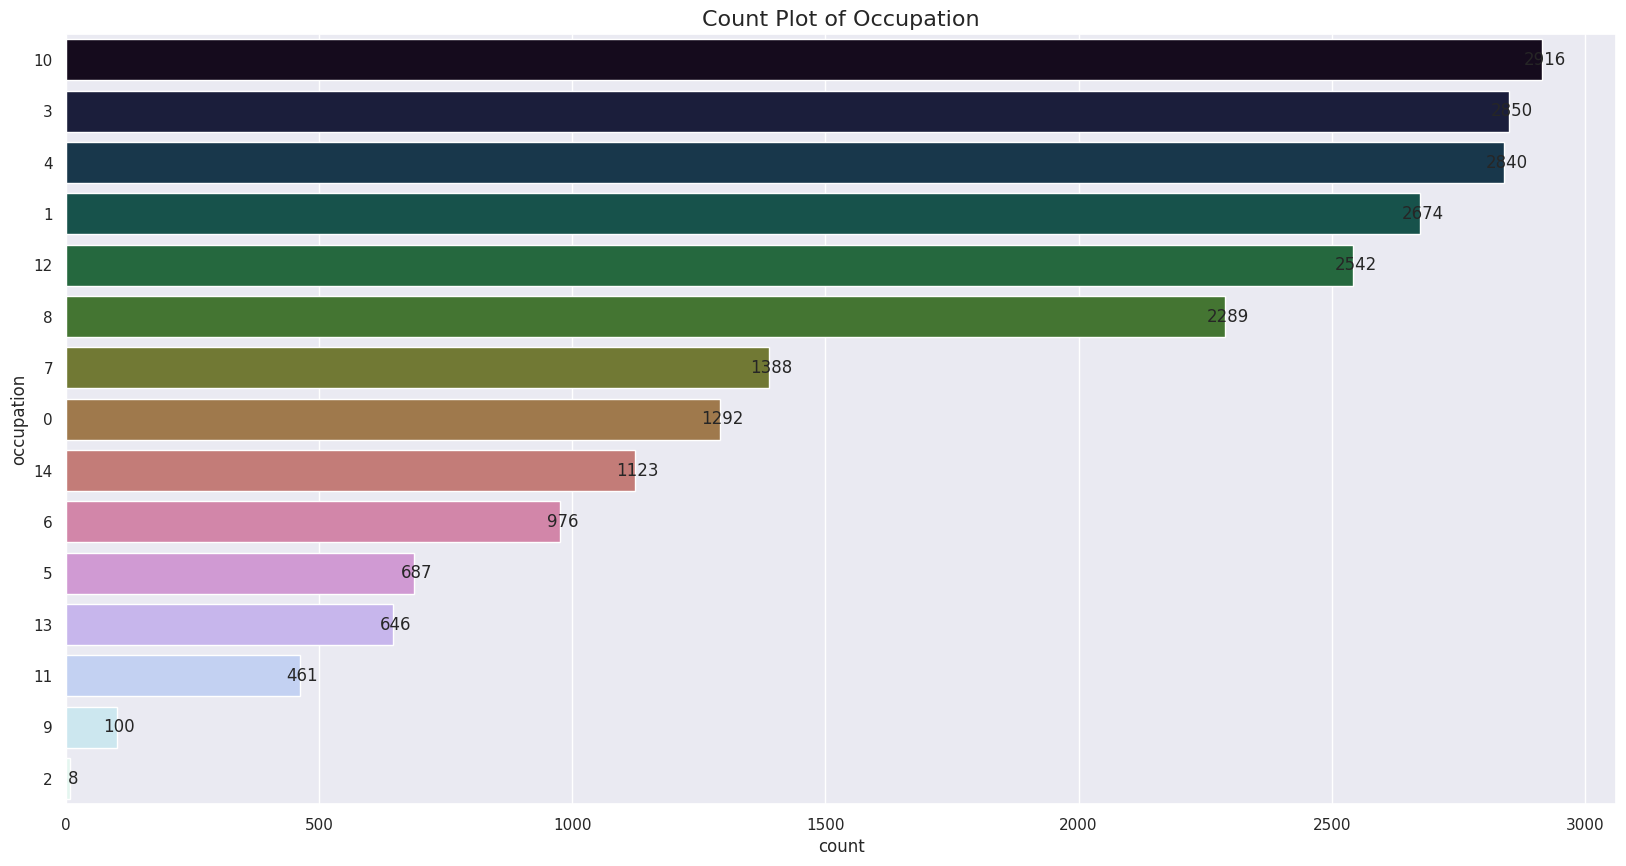

In [36]:
plt.figure(figsize=(20, 10))
occupation_counts = X_train['occupation'].value_counts().sort_values(ascending=False)
sns.countplot(y=X_train['occupation'], data=X_train, order=occupation_counts.index, palette='cubehelix', saturation=0.95)
plt.xticks(rotation=0)  # Rotating labels on y-axis
plt.title('Count Plot of Occupation', fontsize=16)

for i, count in enumerate(occupation_counts):
    plt.text(count + 5, i, str(count), ha='center', va='center', fontsize=12)

plt.show()

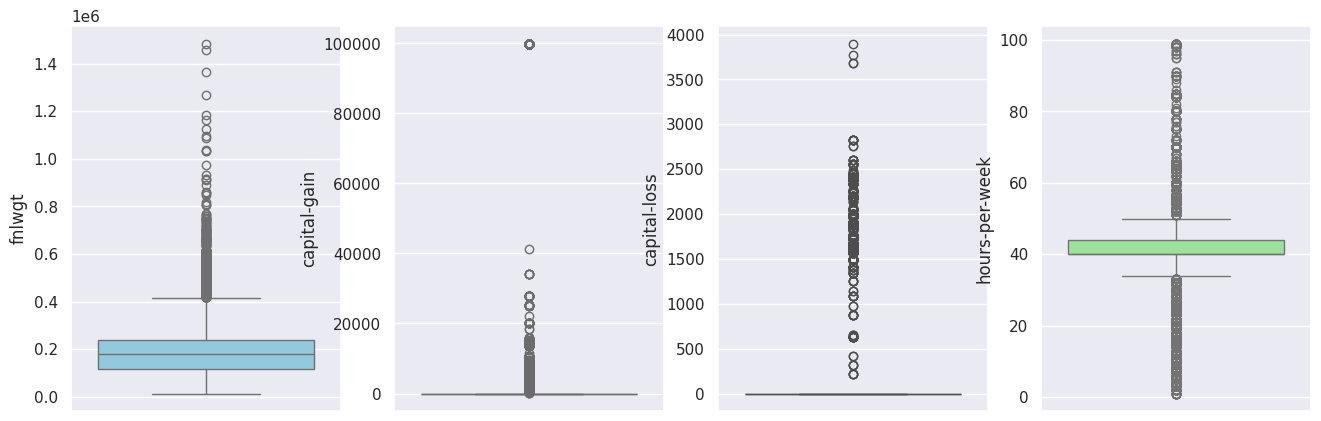

In [37]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(X_train['fnlwgt'],color='skyblue')
plt.subplot(142)
sns.boxplot(X_train['capital-gain'],color='hotpink')
plt.subplot(143)
sns.boxplot(X_train['capital-loss'],color='yellow')
plt.subplot(144)
sns.boxplot(X_train['hours-per-week'],color='lightgreen')
plt.show()

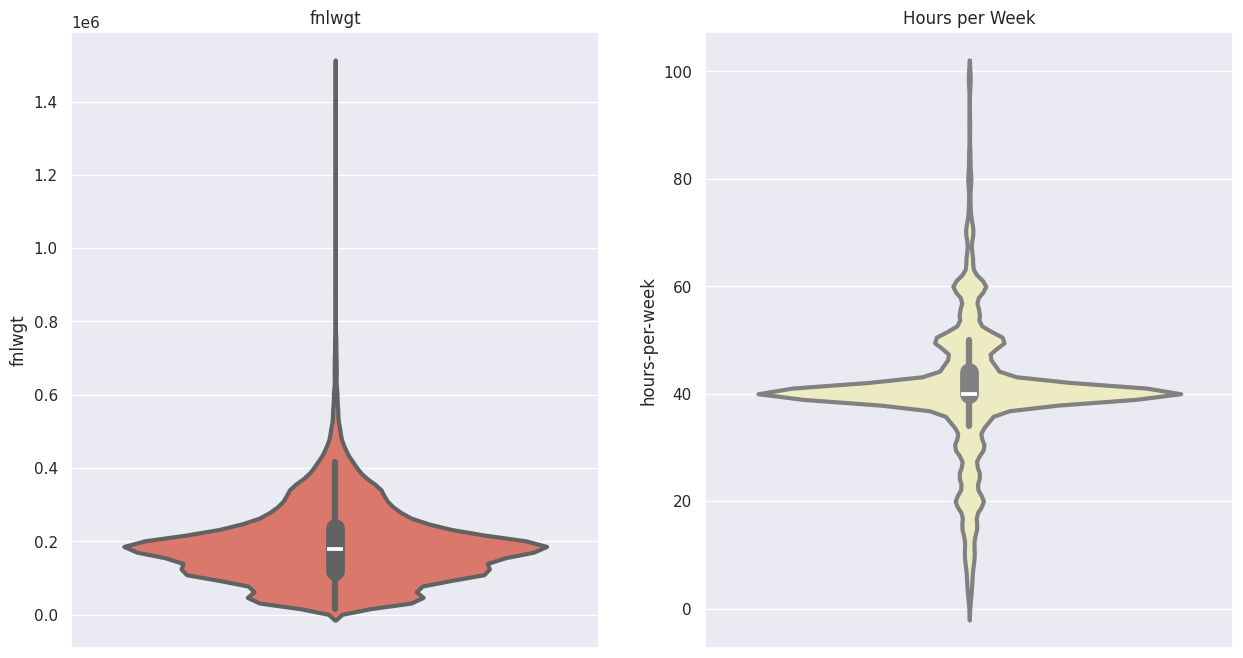

In [38]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.title('fnlwgt')
sns.violinplot(y='fnlwgt', data=X_train, color='#ed6a5a', linewidth=3)

plt.subplot(1, 2, 2)
plt.title('Hours per Week')
sns.violinplot(y='hours-per-week', data=X_train, color='#f4f1bb', linewidth=3)

plt.show()

In [39]:


# Convert 'salary' to binary (e.g., 1 if salary > 50k, else 0)
y = (y > 50000).astype(int)  # Adjust the threshold as per your requirement

# Define the categorical and numerical features
categorical_features = ['workclass',  'marital-status', 'occupation', 'relationship', 'race', 'sex']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])





In [40]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define and train the pipeline for regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the regression model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.12272850717779497
R-squared: 0.3336067056249963


In [41]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Convert continuous predictions to discrete class labels
# Assuming the target (`y_test`) contains discrete class labels
y_pred_class = np.round(y_pred_lr)  # Round predictions to the nearest integer

# Compute accuracy
accuracy_lr = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy_lr)

# Generate classification report
report = classification_report(y_test, y_pred_class)
print("\nClassification Report:")
print(report)


Accuracy: 0.8240352134302386

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7391
         1.0       0.72      0.45      0.56      2378
         2.0       0.00      0.00      0.00         0

    accuracy                           0.82      9769
   macro avg       0.52      0.47      0.48      9769
weighted avg       0.81      0.82      0.81      9769



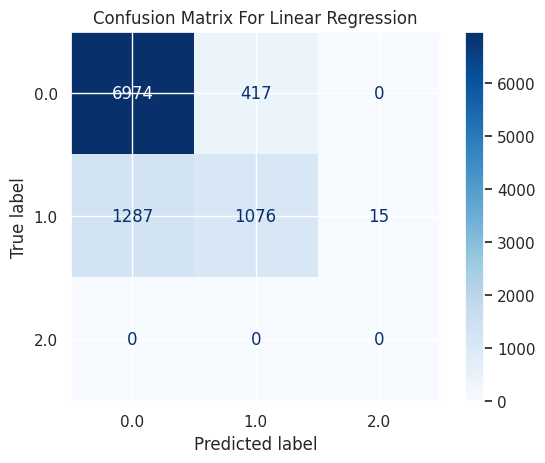

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert continuous predictions to discrete class labels
y_pred_class = np.round(y_pred_lr)  # Round predictions to nearest integer

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Ensure consistent labels across actual and predicted values
all_labels = np.union1d(np.unique(y_test), np.unique(y_pred_class))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix For Linear Regression")
plt.show()


In [43]:
#KNN neighbour
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

print("K-Nearest Neighbors Classifier")
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier
Accuracy: 0.7724434435459105
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7391
           1       0.56      0.31      0.40      2378

    accuracy                           0.77      9769
   macro avg       0.68      0.61      0.63      9769
weighted avg       0.75      0.77      0.75      9769



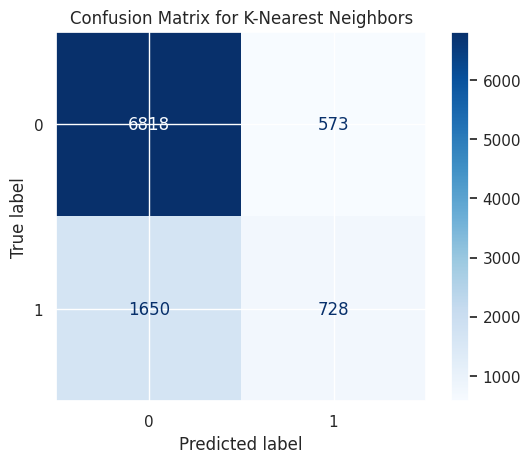

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()


In [45]:
#Decision tree
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

print("Decision Tree Classifier")
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", acc_dt)
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 0.8067355921793428
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7391
           1       0.60      0.60      0.60      2378

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



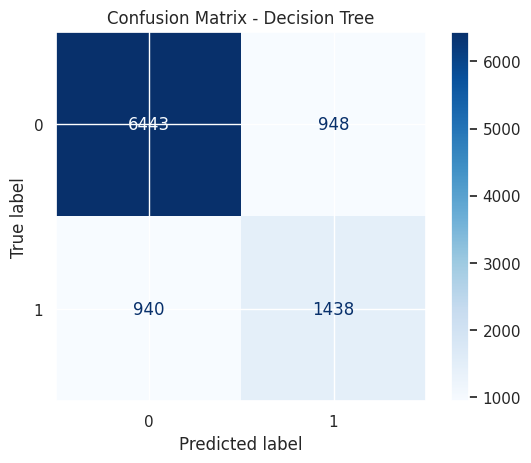

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [47]:
#Random forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest Classifier")
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.8557682464940116
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7391
           1       0.74      0.63      0.68      2378

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



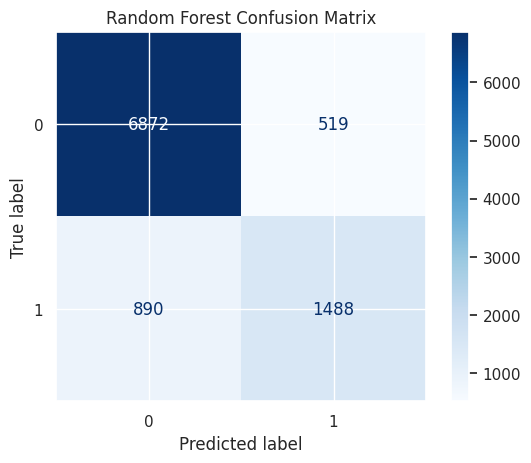

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(y_test))
disp_rf.plot(cmap=plt.cm.Blues)

plt.title("Random Forest Confusion Matrix")
plt.show()


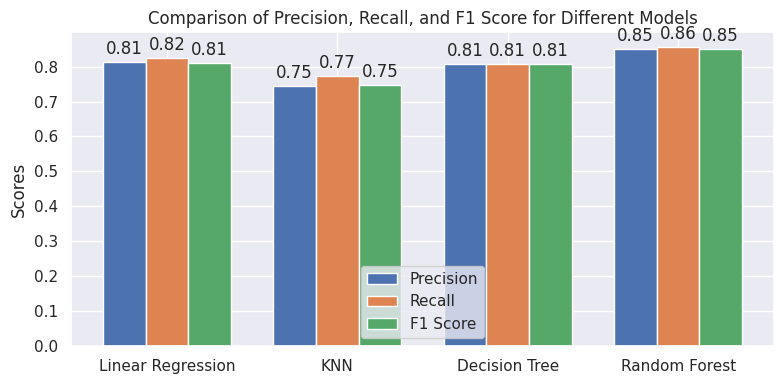

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the models and their predictions
models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']
y_preds = [y_pred_class, y_pred_knn, y_pred_dt, y_pred_rf]

# Initialize lists to store Precision, Recall, and F1 scores
precision = []
recall = []
f1 = []

# Calculate Precision, Recall, and F1 for each model
for i, y_pred in enumerate(y_preds):
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

# Plotting the comparison of Precision, Recall, and F1-score
x = np.arange(len(models))  # The position of each model on the x-axis
width = 0.25  # The width of each bar

fig, ax = plt.subplots(figsize=(8, 4))

# Plot each metric as a separate bar
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1 Score')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1 Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the values on top of the bars for clarity
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()


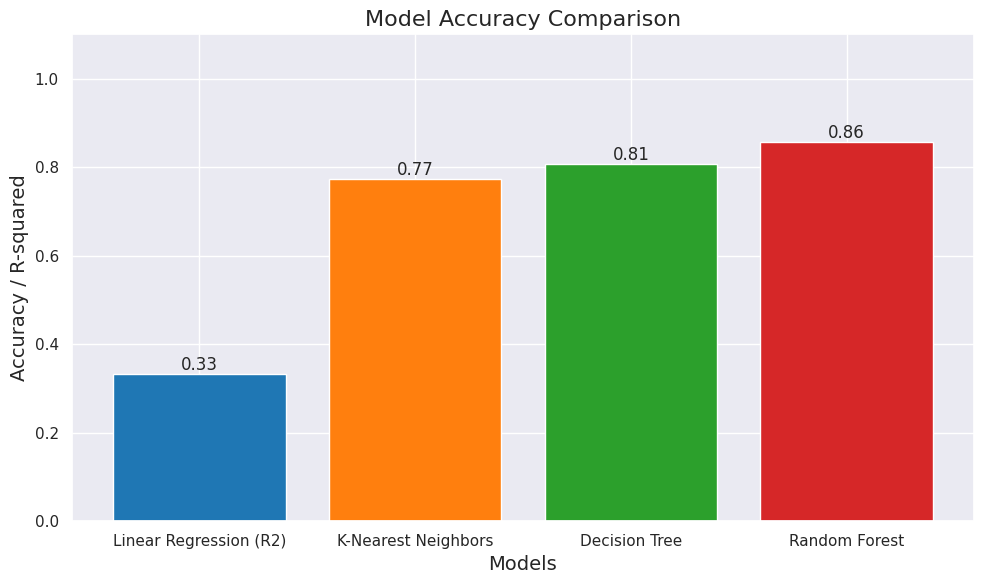

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy rates of the models
models = ['Linear Regression (R2)', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
accuracy_rates = [r2, acc_knn, acc_dt, acc_rf]

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_rates, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adding value annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom', fontsize=12)

# Title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy / R-squared', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0, 1.1)  # Ensure the y-axis is within range [0, 1.1] for better visualization

# Show the plot
plt.tight_layout()
plt.show()
